# NLP - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import spacy
from spacy import displacy
from collections import Counter
from nltk import ngrams
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Is\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key= os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

#Import the library
natural_processing = spacy.load('en_core_web_sm')



In [4]:
# Fetch the Bitcoin news articles
bitcoin = newsapi.get_everything(q='bitcoin',
                                      language='en',
                                      sort_by='relevancy'
                                      )
print(f"Total articles about Bitcoin: {bitcoin['totalResults']}")

Total articles about Bitcoin: 8584


In [5]:
# Fetch the Ethereum news articles
ethereum = newsapi.get_everything(q='Ethereum', language="en", sort_by="relevancy")
print(f"Total articles about Ethereum: {ethereum['totalResults']}")

Total articles about Ethereum: 3315


In [6]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []
for article in bitcoin["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        # append each element of each iteration to the btc_sentiments empty list
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
    
btc_sentiment_df = pd.DataFrame(bitcoin_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_sentiment_df = btc_sentiment_df[cols]

btc_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000
3,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000


In [7]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []
for article in ethereum["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        # append each element of each iteration to the ethereum_sentiments empty list
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
    
eth_sentiment_df = pd.DataFrame(ethereum_sentiments)
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_sentiment_df = eth_sentiment_df[cols]

eth_sentiment_df.head()

,date,text,compound,positive,negative,neutral
0,2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.0,0.784
1,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.000000,20.000000
mean,0.133855,0.04380,0.015550,0.940600
std,0.324405,0.05771,0.039944,0.062847
min,-0.680800,0.00000,0.000000,0.833000
25%,0.000000,0.00000,0.000000,0.895250
50%,0.000000,0.00000,0.000000,0.947000
75%,0.385600,0.09775,0.000000,1.000000
max,0.571900,0.15300,0.167000,1.000000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.307340,0.077450,0.006200,0.916300
std,0.340277,0.078558,0.019083,0.077373
min,-0.318200,0.000000,0.000000,0.779000
25%,0.000000,0.000000,0.000000,0.862750
50%,0.381550,0.074000,0.000000,0.915500
75%,0.549700,0.111750,0.000000,1.000000
max,0.822500,0.221000,0.062000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean at 0.062800

Q: Which coin had the highest compound score?

A: Ethereum had the higher compund mean at 0.285405

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
stopwords_addons = {'said', 'sent', 'found', 'including','new', 'picture', 'today', 'announced', 'week', 'basically', 'also', 'chars', '\r\n'}

In [11]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    
    words = nltk.word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha()]
    str_words = ' '.join(str(e) for e in words)
    
    # Create a tokenized list of the words
    
    doc = natural_processing(str_words)
    doc_words = ' '.join(str(e) for e in doc)
    tok = word_tokenize(doc_words)
    result = [word.lower() for word in tok]
    lemma_words = ' '.join(str(e) for e in result)
    
    # Lemmatize words into root words
    
    lemma_result = lemmatizer.lemmatize(lemma_words)
   
    # Convert the words to lowercase
    
    lower_result = [lemma_result.lower() for word in lemma_result]
    re_words = ' '.join(str(e) for e in lower_result)
    
    # Remove the stop words
    
    re_words = word_tokenize(re_words)
    tokens = [word.lower() for word in re_words if word.lower() not in sw.union(stopwords_addons)]
    
    
    return tokens

In [12]:
# Create a new tokens column for Bitcoin
btc_sentiment_df["tokens"] = btc_sentiment_df["text"].apply(tokenizer)
btc_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-05,A similar hoax earlier this year tied Walmart ...,-0.2732,0.000,0.063,0.937,"[similar, hoax, earlier, year, tied, walmart, ..."
1,2021-10-28,Theres a big new presence slurping up power fr...,0.3612,0.096,0.000,0.904,"[big, presence, slurping, power, grid, growing..."
2,2021-10-26,"For all the talk of democratizing finance, the...",0.0000,0.000,0.000,1.000,"[talk, democratizing, finance, vast, majority,..."
3,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.000,0.847,"[keeping, previous, announcement, amc, theater..."
4,2021-10-21,Representation of cryptocurrency Bitcoin is pl...,0.0000,0.000,0.000,1.000,"[representation, cryptocurrency, bitcoin, plac..."


In [13]:
# Create a new tokens column for Ethereum

eth_sentiment_df["tokens"] = eth_sentiment_df["text"].apply(tokenizer)
eth_sentiment_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2021-11-19,"If you claim ownership, someone will probably ...",0.7783,0.216,0.0,0.784,"[claim, ownership, someone, probably, want, ta..."
1,2021-11-12,"In keeping with a previous announcement, AMC t...",0.5719,0.153,0.0,0.847,"[keeping, previous, announcement, amc, theater..."
2,2021-11-05,Ethereum and bitcoin are the two biggest crypt...,0.4588,0.094,0.0,0.906,"[ethereum, bitcoin, two, biggest, cryptocurren..."
3,2021-11-01,Elon Musk\r\npicture alliance / Getty Images\r...,0.5267,0.093,0.0,0.907,"[elon, musk, alliance, getty, images, cryptocu..."
4,2021-11-01,Cryptocurrency and business continuity line im...,0.4588,0.097,0.0,0.903,"[cryptocurrency, business, continuity, line, i..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [14]:
# Generate the Bitcoin N-grams where N=2
btc_grams = ngrams(tokenizer(btc_sentiment_df["text"].str.cat()), n=2)
Counter(btc_grams).most_common(20)

[(('illustration', 'taken'), 14248),
 (('reuters', 'bitcoin'), 14248),
 (('cryptocurrency', 'bitcoin'), 10686),
 (('oct', 'reuters'), 10686),
 (('bitcoin', 'mining'), 7124),
 (('motherboard', 'illustration'), 7124),
 (('kong', 'oct'), 7124),
 (('bitcoin', 'fell'), 7124),
 (('representation', 'virtual'), 7124),
 (('virtual', 'cryptocurrency'), 7124),
 (('bitcoin', 'seen'), 7124),
 (('seen', 'illustration'), 7124),
 (('taken', 'october'), 7124),
 (('trading', 'higher'), 7124),
 (('australian', 'baseball'), 7124),
 (('baseball', 'league'), 7124),
 (('perth', 'heat'), 7124),
 (('pay', 'players'), 7124),
 (('nov', 'reuters'), 7124),
 (('similar', 'hoax'), 3562)]

In [15]:
# Generate the Ethereum N-grams where N=2
eth_grams = ngrams(tokenizer(eth_sentiment_df["text"].str.cat()), n=2)
Counter(eth_grams).most_common(20)

[(('bitcoin', 'ethereum'), 14516),
 (('getty', 'images'), 14516),
 (('rahul', 'rai'), 10887),
 (('ethereum', 'bitcoin'), 7258),
 (('elon', 'musk'), 7258),
 (('ethereum', 'dogecoin'), 7258),
 (('york', 'nov'), 7258),
 (('los', 'angeles'), 7258),
 (('claim', 'ownership'), 3629),
 (('ownership', 'someone'), 3629),
 (('someone', 'probably'), 3629),
 (('probably', 'want'), 3629),
 (('want', 'take'), 3629),
 (('take', 'may'), 3629),
 (('may', 'one'), 3629),
 (('one', 'better'), 3629),
 (('better', 'pieces'), 3629),
 (('pieces', 'performance'), 3629),
 (('performance', 'art'), 3629),
 (('art', 'year'), 3629)]

In [16]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [17]:
# Use token_count to get the top 10 words for Bitcoin
btc_all = tokenizer(btc_sentiment_df["text"].str.cat())
result_top10_btc = token_count(btc_all, 10)
print(result_top10_btc)

[('bitcoin', 89050), ('cryptocurrency', 21372), ('reuters', 21372), ('illustration', 17810), ('taken', 17810), ('ether', 17810), ('trading', 14248), ('crypto', 14248), ('commission', 10686), ('mining', 10686)]


In [18]:
# Use token_count to get the top 10 words for Ethereum
eth_all = tokenizer(eth_sentiment_df["text"].str.cat())

result_top10_eth = token_count(eth_all, 10)
print(result_top10_eth)

[('bitcoin', 43548), ('ethereum', 36290), ('cryptocurrency', 29032), ('images', 18145), ('crypto', 14516), ('getty', 14516), ('york', 14516), ('ether', 14516), ('cryptocurrencies', 10887), ('business', 10887)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [25.0, 12.0]

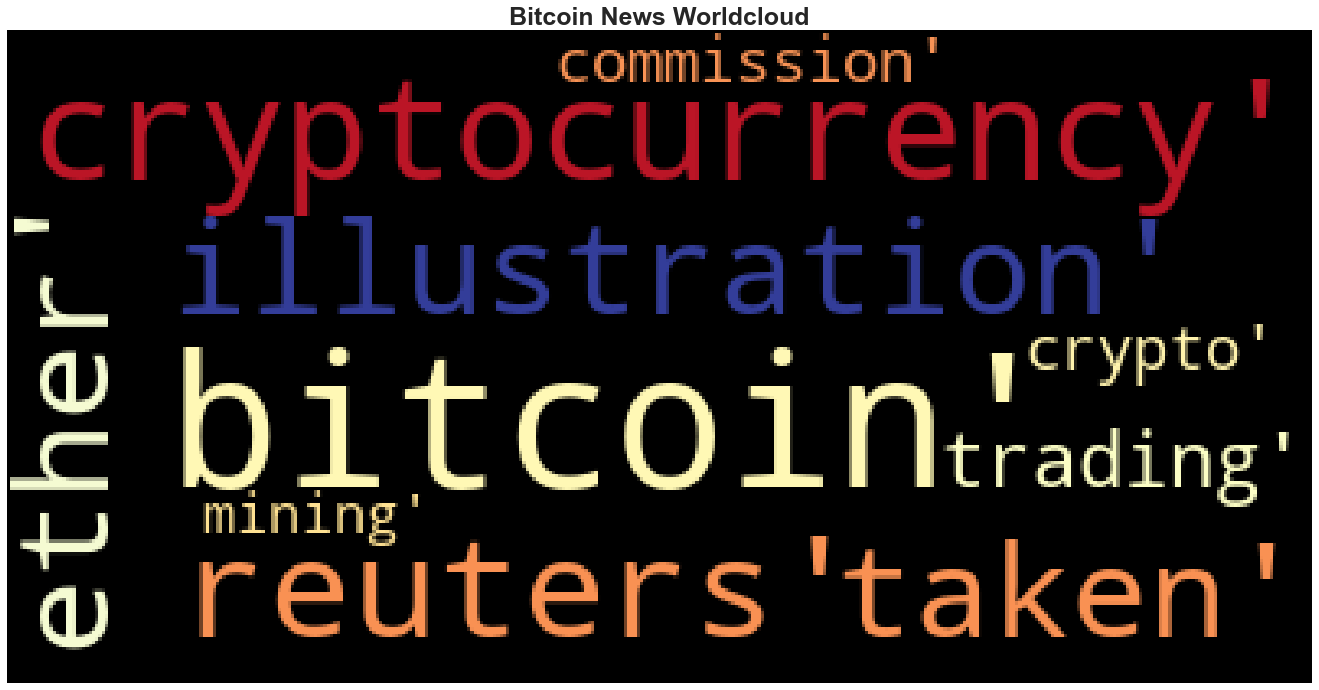

In [20]:
# Generate the Bitcoin word cloud
terms_list_btc = str(result_top10_btc)

# Create the word cloud
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list_btc)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 25, "fontweight": "bold"}
plt.title("Bitcoin News Worldcloud", fontdict=fontdict)
plt.show()

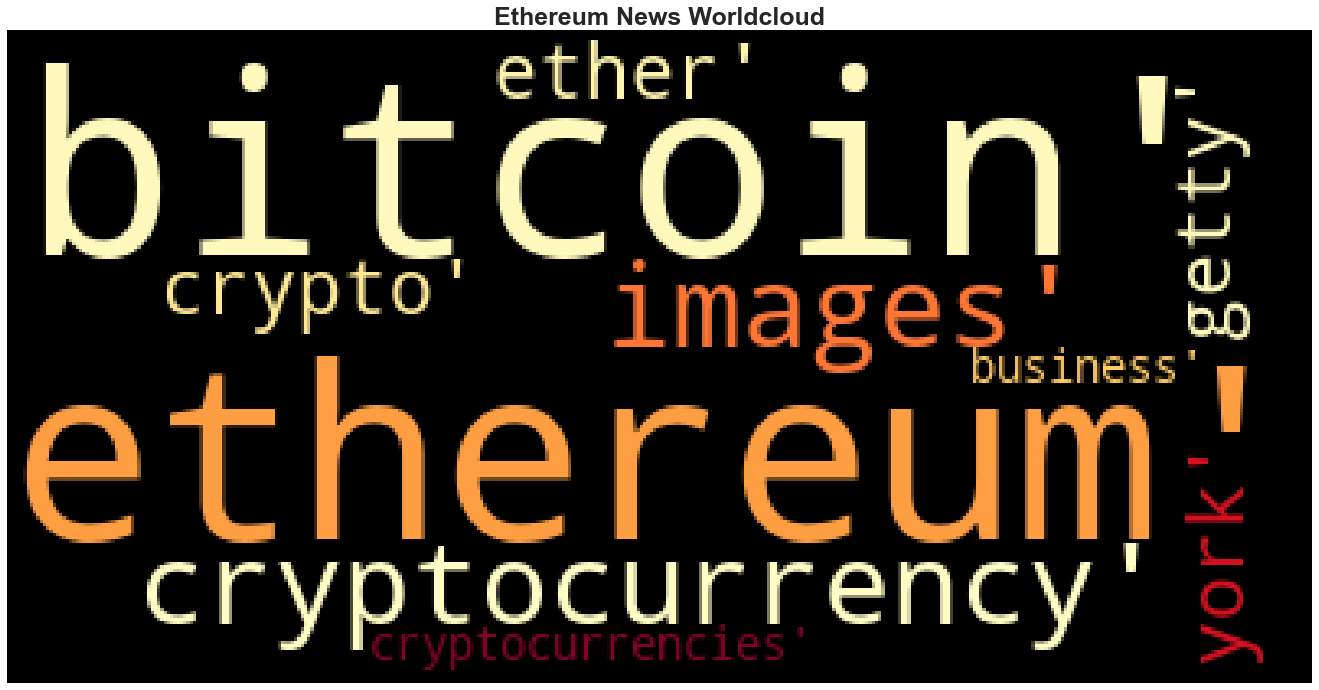

In [21]:
# Generate the Ethereum word cloud
terms_list_eth = str(result_top10_eth)

# Create the word cloud
wordcloud = WordCloud(colormap="YlOrRd").generate(terms_list_eth)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 25, "fontweight": "bold"}
plt.title("Ethereum News Worldcloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [22]:
import spacy
from spacy import displacy

---
### Bitcoin NER

In [23]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc_sentiment_df["text"].str.cat()

In [24]:
# Run the NER processor on all of the text
doc = natural_processing(all_btc_text)
# Add a title to the document
doc.user_data["title"] = "Title: Bitcoin NER"

In [25]:
# Render the visualization
displacy.render(doc, style='ent')

In [26]:
# List all Entities
doc.ents

(earlier this year,
 Verge,
 Vox Media,
 Photo Illustration,
 Thiago Prudencio/S,
 U.S.,
 U.S.,
 China,
 Bloomberg,
 the National Bureau,
 AMC,
 Bitcoin,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/,
 IllustrationHONG KONG,
 Oct 21,
 Reuters,
 Bitcoin,
 October 19, 2021,
 REUTERS,
 Reuters,
 Bitcoin,
 October 19, 2021,
 REUTERS,
 Edgar SuHONG KONG,
 Reuters,
 Wednesday,
 first,
 U.S.,
 Conway G. Gittens,
 Bitcoin 2021,
 Marco Bello/,
 The Securities and Exchange Commission,
 Valkyrie,
 +1492 chars]Ether,
 NurPhoto,
 ETF,
 first,
 ETF,
 7%,
 Monday,
 morning,
 around $66,105,
 3%,
 4,722,
 over 9%,
 Baseball League,
 Perth Heat,
 first,
 Hea,
 Mexican,
 Volaris,
 Benito Juarez International Airport,
 Mexico City,
 Mexico,
 January 10, 2018,
 January 10, 2018,
 68,000,
 Ether,
 5k,
 CoinGecko,
 more than $3 trillion,
 May 20, 2021,
 REUTERS,
 Dado Ruvic/File PhotoLONDON,
 Reuters,
 60,
 Tuesday,
 Chinas National Development and Reform Commission,
 Meng Wei,
 chars]A decade ago,
 just a few yea

---

### Ethereum NER

In [27]:
# Concatenate all of the Ethereum text together
all_ethereum_text = eth_sentiment_df["text"].str.cat()

In [28]:
# Run the NER processor on all of the text
doc = natural_processing(all_ethereum_text)
# Add a title to the document
doc.user_data["title"] = "Title: Ethereum NER"

In [29]:
# Render the visualization
displacy.render(doc, style='ent')

In [30]:
# List all Entities
doc.ents

(this year,
 Australian Geoffrey Huntley,
 AMC,
 two,
 Jordan Mansfield,
 JPMorgan,
 beca,
 Musk,
 Getty Images,
 Elon Musk,
 3,780%,
 October,
 Dogelon Mars,
 0.00000229,
 November 1,
 0.0,
 Getty Images,
 the past week,
 Facebook,
 Tim Cook,
 The New York Times',
 Tuesday,
 1-2%,
 Ethereum,
 NurPhoto,
 Getty Images,
 first,
 Bitcoin, Ethereum,
 DogeCoin,
 June 29, 2021,
 REUTERS,
 Dado Ruvic/Illustration/File Photo MU,
 less than two weeks,
 Burger King,
 Robinhood,
 Royal Perks,
 5,
 Getty Images,
 Ethereum,
 US,
 Rai,
 Market Neutral,
 BlockTower Capital,
 Rahul Rai,
 Crypto,
 Rahul Rai,
 20,
 NFT,
 second,
 a record above $,
 4,400,
 Friday,
 Ethereum,
 Bitcoin’s,
 second,
 Reuters,
 a record $6.4 billion,
 this year,
 CoinShares,
 American Airlines,
 Airbus,
 A321-200,
 Los Angeles International,
 Los Angeles,
 California,
 U.S.,
 March 28, 2018,
 REUTERS,
 Mike Blake/File PhotoNEW YORK,
 Reute,
 Thursday,
 6:13 p.m.,
 New York,
 Ethereum,
 0x8e39,
 NFT,
 Lionsgate/Miramax,
 Quen

---